In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('rf_heart_2020_cleaned.csv')

INITIAL EDA

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df["HeartDisease"].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [9]:
df["Race"].value_counts()

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

In [10]:
df["AgeCategory"].value_counts()

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

Data Clean Up And Preparations

In [11]:
df["HeartDisease"]      = df["HeartDisease"].map({"Yes": 1, "No": 0})
df["Smoking"]           = df["Smoking"].map({"Yes": 1, "No": 0})
df["AlcoholDrinking"]   = df["AlcoholDrinking"].map({"Yes": 1, "No": 0})
df["Stroke"]            = df["Stroke"].map({"Yes": 1, "No": 0})
df["DiffWalking"]       = df["DiffWalking"].map({"Yes": 1, "No": 0})
df["Sex"]               = df["Sex"].map({"Male": 1, "Female": 0})
df["Race"]              = df["Race"].map({"White": 1, "Hispanic": 2, "Black": 3, "Other": 4, "Asian": 5, "American Indian/Alaskan Native": 6})
df["Diabetic"]          = df["Diabetic"].map({"Yes": 1, "No": 0})
df["PhysicalActivity"]  = df["PhysicalActivity"].map({"Yes": 1, "No": 0})
df["GenHealth"]         = df["GenHealth"].map({"Excellent": 1, "Very good": 2, "Good": 3, "Fair": 4, "Poor": 5})
df["Asthma"]            = df["Asthma"].map({"Yes": 1, "No": 0})
df["KidneyDisease"]     = df["KidneyDisease"].map({"Yes": 1, "No": 0})
df["SkinCancer"]        = df["SkinCancer"].map({"Yes": 1, "No": 0})
df["AgeCategory"]       = df["AgeCategory"].map({"18-24": 1, "25-29": 2, "30-34": 3, "35-39": 4, "40-44": 5, "45-49": 6, "50-54": 7, "55-59": 8, "60-64": 9, "65-69": 10, "70-74": 11, "75-79": 12, "80 or older": 13})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,1,1.0,1,2,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,1,0.0,1,2,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1.0,1,4,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,1,0.0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,1,0.0,1,2,8.0,0,0,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

<Axes: >

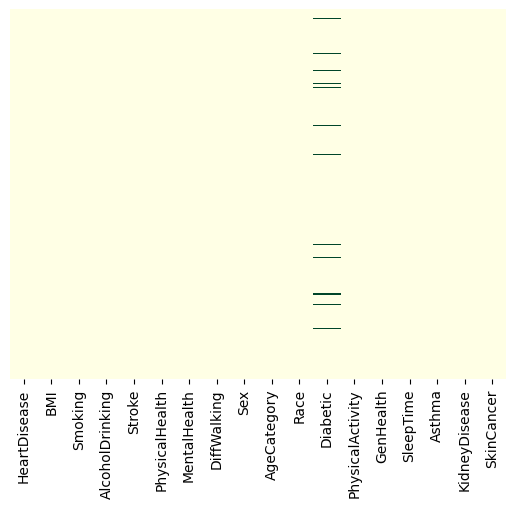

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="YlGn")

In [14]:
df = df.dropna(axis=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310455 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      310455 non-null  int64  
 1   BMI               310455 non-null  float64
 2   Smoking           310455 non-null  int64  
 3   AlcoholDrinking   310455 non-null  int64  
 4   Stroke            310455 non-null  int64  
 5   PhysicalHealth    310455 non-null  float64
 6   MentalHealth      310455 non-null  float64
 7   DiffWalking       310455 non-null  int64  
 8   Sex               310455 non-null  int64  
 9   AgeCategory       310455 non-null  int64  
 10  Race              310455 non-null  int64  
 11  Diabetic          310455 non-null  float64
 12  PhysicalActivity  310455 non-null  int64  
 13  GenHealth         310455 non-null  int64  
 14  SleepTime         310455 non-null  float64
 15  Asthma            310455 non-null  int64  
 16  KidneyDisease     310455 

In [16]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

----

Trying KNN With The Original Data
-

In [17]:
K = 3
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
prediction = knn.predict(X_test)

In [19]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[82643  2528]
 [ 7008   958]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     85171
           1       0.27      0.12      0.17      7966

    accuracy                           0.90     93137
   macro avg       0.60      0.55      0.56     93137
weighted avg       0.87      0.90      0.88     93137



In [21]:
error_rates = []

limit = 30

for i in range(1,limit):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rates.append(np.mean(pred_y != y_test))

Text(0, 0.5, 'Error rate values')

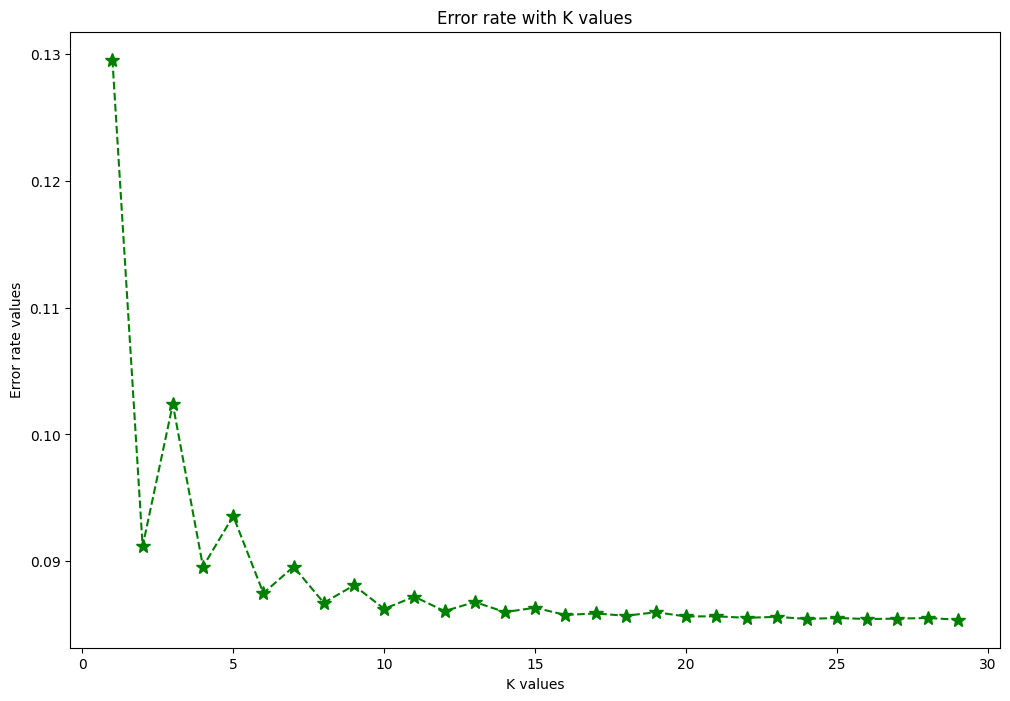

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rates, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [23]:
K = 30
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[85108    63]
 [ 7897    69]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85171
           1       0.52      0.01      0.02      7966

    accuracy                           0.91     93137
   macro avg       0.72      0.50      0.49     93137
weighted avg       0.88      0.91      0.88     93137



Trying KNN With Standardized Data
-

In [24]:
data = df.drop(["HeartDisease"],axis=1).values
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
standard_data = (data - mean) / std_dev

standard_df = pd.DataFrame(standard_data, columns=df.drop(["HeartDisease"], axis = 1).columns)

In [25]:
standard_df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.844743,1.194160,-0.27117,-0.197394,-0.043789,3.297917,-0.399207,-0.959825,0.140026,-0.460663,2.570762,0.536694,-0.381309,-1.464159,2.555425,-0.195395,3.118247
1,-1.253751,-0.837409,-0.27117,5.066016,-0.422386,-0.488676,-0.399207,-0.959825,1.540110,-0.460663,-0.388990,0.536694,-0.381309,-0.069785,-0.391324,-0.195395,-0.320693
2,-0.267713,1.194160,-0.27117,-0.197394,2.101595,3.297917,-0.399207,1.041857,0.700060,-0.460663,2.570762,0.536694,1.537409,0.627402,2.555425,-0.195395,-0.320693
3,-0.642218,-0.837409,-0.27117,-0.197394,-0.422386,-0.488676,-0.399207,-0.959825,1.260094,-0.460663,-0.388990,-1.863261,0.578050,-0.766972,-0.391324,-0.195395,3.118247
4,-0.721227,-0.837409,-0.27117,-0.197394,3.111188,-0.488676,2.504969,-0.959825,-0.700025,-0.460663,-0.388990,0.536694,-0.381309,0.627402,-0.391324,-0.195395,-0.320693


In [26]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis=1))

StandardScaler()

In [27]:
sk_features_scaled = scaler.transform(df.drop("HeartDisease",axis=1))

In [28]:
sk_features_scaled

array([[-1.84474269,  1.19415964, -0.27116964, ...,  2.55542519,
        -0.19539471,  3.11824691],
       [-1.25375147, -0.83740898, -0.27116964, ..., -0.39132431,
        -0.19539471, -0.32069301],
       [-0.26771264,  1.19415964, -0.27116964, ...,  2.55542519,
        -0.19539471, -0.32069301],
       ...,
       [-0.6374772 , -0.83740898, -0.27116964, ..., -0.39132431,
        -0.19539471, -0.32069301],
       [ 0.71674599, -0.83740898, -0.27116964, ..., -0.39132431,
        -0.19539471, -0.32069301],
       [ 2.88950782, -0.83740898, -0.27116964, ..., -0.39132431,
        -0.19539471, -0.32069301]])

In [29]:
df_features_scaled = pd.DataFrame(sk_features_scaled, columns=df.columns[1:])

In [30]:
df_features_scaled.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.844743,1.194160,-0.27117,-0.197394,-0.043789,3.297917,-0.399207,-0.959825,0.140026,-0.460663,2.570762,0.536694,-0.381309,-1.464159,2.555425,-0.195395,3.118247
1,-1.253751,-0.837409,-0.27117,5.066016,-0.422386,-0.488676,-0.399207,-0.959825,1.540110,-0.460663,-0.388990,0.536694,-0.381309,-0.069785,-0.391324,-0.195395,-0.320693
2,-0.267713,1.194160,-0.27117,-0.197394,2.101595,3.297917,-0.399207,1.041857,0.700060,-0.460663,2.570762,0.536694,1.537409,0.627402,2.555425,-0.195395,-0.320693
3,-0.642218,-0.837409,-0.27117,-0.197394,-0.422386,-0.488676,-0.399207,-0.959825,1.260094,-0.460663,-0.388990,-1.863261,0.578050,-0.766972,-0.391324,-0.195395,3.118247
4,-0.721227,-0.837409,-0.27117,-0.197394,3.111188,-0.488676,2.504969,-0.959825,-0.700025,-0.460663,-0.388990,0.536694,-0.381309,0.627402,-0.391324,-0.195395,-0.320693


In [31]:
X = df_features_scaled
y = df['HeartDisease']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [33]:
K = 1
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[78869  6302]
 [ 6142  1824]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     85171
           1       0.22      0.23      0.23      7966

    accuracy                           0.87     93137
   macro avg       0.58      0.58      0.58     93137
weighted avg       0.87      0.87      0.87     93137



In [34]:
error_rates = []

limit = 30

for i in range(1,limit):
    print("Iteration: ",i, end = " ")
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred_y = knn.predict(X_test)
    error_rates.append(np.mean(pred_y != y_test))
    print("done.")

Iteration:  1 done.
Iteration:  2 done.
Iteration:  3 done.
Iteration:  4 done.
Iteration:  5 done.
Iteration:  6 done.
Iteration:  7 done.
Iteration:  8 done.
Iteration:  9 done.
Iteration:  10 done.
Iteration:  11 done.
Iteration:  12 done.
Iteration:  13 done.
Iteration:  14 done.
Iteration:  15 done.
Iteration:  16 done.
Iteration:  17 done.
Iteration:  18 done.
Iteration:  19 done.
Iteration:  20 done.
Iteration:  21 done.
Iteration:  22 done.
Iteration:  23 done.
Iteration:  24 done.
Iteration:  25 done.
Iteration:  26 done.
Iteration:  27 done.
Iteration:  28 done.
Iteration:  29 done.


Text(0, 0.5, 'Error rate values')

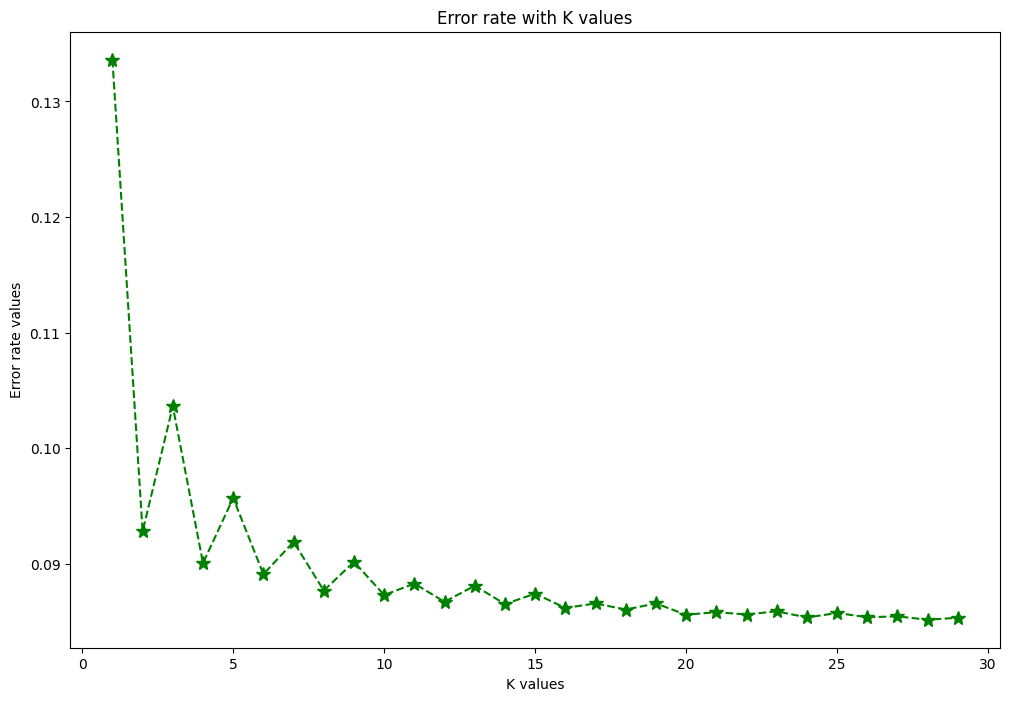

In [35]:
plt.figure(figsize=(12,8))
plt.plot(range(1,limit), error_rates, color="green", linestyle="--", marker="*", markersize=10)
plt.title("Error rate with K values")
plt.xlabel("K values")
plt.ylabel("Error rate values")

In [36]:
K = 30
knn = KNeighborsClassifier(K)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[84767   404]
 [ 7525   441]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     85171
           1       0.52      0.06      0.10      7966

    accuracy                           0.91     93137
   macro avg       0.72      0.53      0.53     93137
weighted avg       0.88      0.91      0.88     93137



----------------------------------------------------------------------------------------------------------------

Now Trying The Decision Tree and Random Forest
-

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
tree_pred = decision_tree.predict(X_test)

In [40]:
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[52349  4435]
 [ 3964  1343]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     56784
           1       0.23      0.25      0.24      5307

    accuracy                           0.86     62091
   macro avg       0.58      0.59      0.58     62091
weighted avg       0.87      0.86      0.87     62091



In [41]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
random_pred = random_forest_model.predict(X_test)

In [43]:
print(confusion_matrix(y_test, random_pred))
print(classification_report(y_test, random_pred))

[[55593  1191]
 [ 4672   635]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56784
           1       0.35      0.12      0.18      5307

    accuracy                           0.91     62091
   macro avg       0.64      0.55      0.56     62091
weighted avg       0.87      0.91      0.88     62091



-----------------